In [1]:
import json
from networkx.readwrite import json_graph

# Try reading the data back in -- writing this function for Jonathan
def read_data_for_jonathan():
    with open('data/possessions_for_jonathan.json', 'r') as f:
        possessions_for_jonathan = json.load(f)
    
    for possession in possessions_for_jonathan:
        possession['attacking_graph'] = json_graph.node_link_graph(possession['attacking_graph'])
        possession['defensive_graphs'] = [json_graph.node_link_graph(G_defense) for G_defense in possession['defensive_graphs']]

    return possessions_for_jonathan

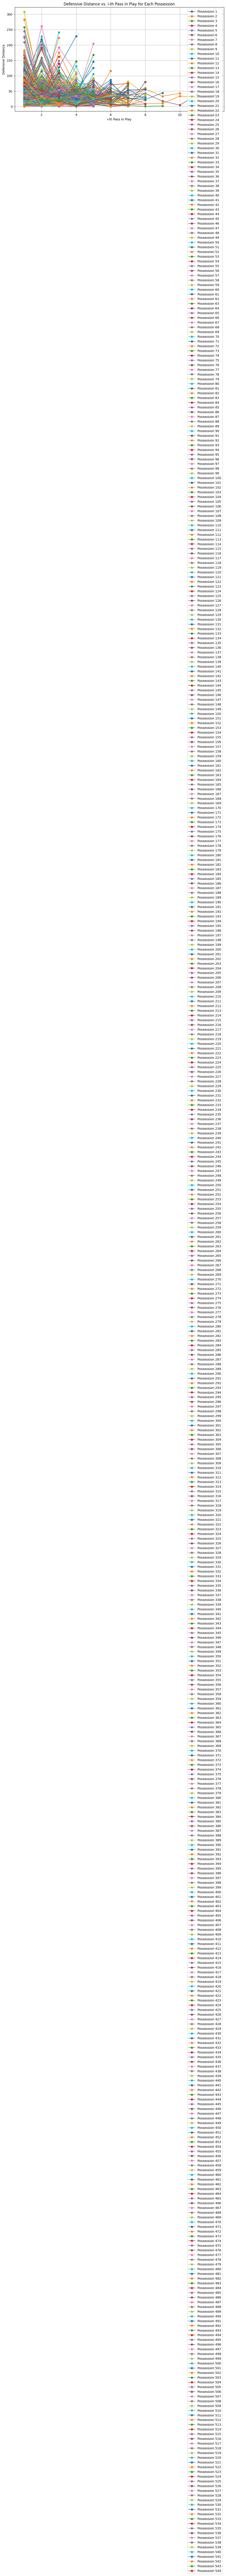

In [2]:
from matplotlib import pyplot as plt

def create_defensive_distance_graph():
    possessions = read_data_for_jonathan()

    plt.figure(figsize=(12, 6))
    for i, possession in enumerate(possessions):
        if 'CombinedPasses' in possession:
            distances = [pass_['distance'] for pass_ in possession['CombinedPasses']]
            plt.plot(range(1, len(distances) + 1), distances, marker='o', label=f'Possession {i+1}')

    plt.xlabel('i-th Pass in Play')
    plt.ylabel('Defensive Distance')
    plt.title('Defensive Distance vs. i-th Pass in Play for Each Possession')
    plt.legend()
    plt.grid(True)
    plt.show()
create_defensive_distance_graph()